In [56]:
import sys
import itertools


class IntcodeMachine:
    def __init__(self, data):
        self.memory = data
        self.pointer = 0
        self.size = len(data)
        self.out = 0
        self.halt = False
        self.initialized = False
        self.relBase = 0
        self.pos = 0
        self.inject_coords = None

    def process(self, inputArg = None):
        if inputArg != None:  
            self.initialized = True
        
        while self.pointer < self.size:
            opcode = int(str(self.memory[self.pointer])[-2:])
            paramModes = str(self.memory[self.pointer])[:-2]
            if (opcode == 99): # HALT
                self.halt = True
                #print('halt')
                break
            elif (opcode == 1): # OPCODE 01 - Sum
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) + self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 2): # OPCODE 02 - Multiply
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) * self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 3):  # OPCODE 03 - Input
                if inputArg != None:
                    self.__setParam(paramModes, 1, inputArg)
                    inputArg = None
                else:
                    if VERBOSE:
                        self.__setParam(paramModes, 1, self.inject_coords[self.pos])
                        self.pos += 1
                        if self.pos > 1:
                            self.pos = 0
                    else:
                        break
                self.pointer += 2
            elif (opcode == 4):  # OPCODE 04 - Print
                out = self.__getParam(paramModes,1)
                #if VERBOSE:
                    #print(">> " + str(out))
                self.out = out
                self.pointer += 2
            # Start of part 2
            elif (opcode == 5):  # OPCODE 05 - JNZ (jump if not zero)
                if (self.__getParam(paramModes,1) != 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 6):  # OPCODE 06 - JZ (jump if zero)
                if (self.__getParam(paramModes,1) == 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 7):  # OPCODE 07 - Set 1 if first is less than second else 0
                if (self.__getParam(paramModes,1) < self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif (opcode == 8):  # OPCODE 08 - Set 1 if first is equal to second else 0
                if (self.__getParam(paramModes,1) == self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif opcode == 9:
                self.relBase += self.__getParam(paramModes,1)
                self.pointer += 2
            else:
                print(str(self.memory[self.pointer]) + " Something went wrong :(")
                break

    def __getParam(self, paramModes, param):
        return self.memory[self.__getParamAddress(paramModes, param)]

    def __setParam(self, paramModes, param, value):
        self.memory[self.__getParamAddress(paramModes, param)] = value
    
    def __getParamAddress(self, paramModes, param):
        type = 0
        try:
            type = int(paramModes[-param])
        except:
            pass
        if type == 0:
            return self.memory[self.pointer + param]
        elif type == 1:
            return self.pointer + param
        elif type == 2:
            offset = self.memory[self.pointer + param]
            return self.relBase + offset
        else:
            print('Param type error')
            return 0

VERBOSE = True
ans = []
total = 0
for x in range(200,400):
    for y in range(0,400):
        data = list(map(lambda x: int(x), open('./input-19.txt', "r").read().split(','))) + [0 for i in range(10000)]
        machine = IntcodeMachine(data)
        machine.inject_coords = (x,y)
        machine.process()
        results = machine.out
        ans.append((x,y,results))
#        print(results)
        if results == 1:
            #print(x,y)
            total+=1
            
print('part 1',total)

part 1 8865


In [86]:
for x in range(1020-55,1020+5,1):
    for y in range(560-55,560+5,1):
        checks = [False,False,False,False]
        testpoints = [(x,y), (x,y+99),(x+99, y+99),(x+99,y)]

        for tid,t in enumerate(testpoints):
            data = list(map(lambda x: int(x), open('./input-19.txt', "r").read().split(','))) + [0 for i in range(10000)]
            machine = IntcodeMachine(data)
            machine.inject_coords = t
            machine.process()
            results = machine.out
            #ans.append((x,y,results))
            if results ==1:
                checks[tid]= True
            if results == 0:
                break
#        print(results)
        if checks[0] and checks[1] and checks[2] and checks[3]:
            print('All matched:',x,y)
            print(x*10000+y)
            break


All matched: 1011 555
10110555
All matched: 1013 556
10130556
All matched: 1014 557
10140557
All matched: 1015 557
10150557
All matched: 1016 558
10160558
All matched: 1017 558
10170558
All matched: 1018 559
10180559
All matched: 1019 559
10190559
All matched: 1020 560
10200560
All matched: 1021 560
10210560
All matched: 1022 561
10220561
All matched: 1023 561
10230561
All matched: 1024 562
10240562


In [78]:
x,y

(1110, 555)

In [73]:
x*10000+y

11080552

In [57]:
import matplotlib.pyplot as plt

%matplotlib inline

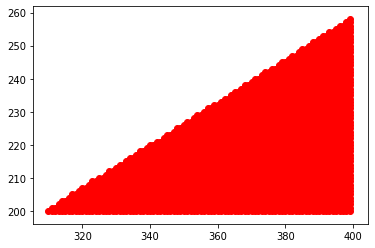

In [51]:
for x,y,a in ans:
    if a != 0:
        plt.scatter(x,y,c='r')

In [58]:
import numpy as np 
grid = np.zeros((400,400))

for x,y,a in ans:
    grid[x,y] = a


In [55]:
grid.sum(axis=1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [ ]:
plt.plot(grid.sum(axis=1))

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(grid.sum(axis=0))